In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import json

## 1. Load nodes and edges from JSON file

In [2]:
nodes = json.load(open('./genshin_data/node_list.json', 'rb'))
edges = json.load(open('./genshin_data/edge_list.json', 'rb'))

In [3]:
# example look of the node_list JSON file
nodes[1]

{'id': 'Keqing', 'nation': 'Liyue'}

In [4]:
# example look of the edge_list JSON file
edges[1]

{'type': 'voice', 'from': 'Amber', 'to': 'Klee'}

## 2. Creating directed graph

In [5]:
%%time

directed_graph = nx.DiGraph()

# add characters with a nation attribute
for node in nodes:
    directed_graph.add_node(node['id'], nation=node['nation'])

# add character relations
for edge in edges:
    directed_graph.add_edge(edge['from'], edge['to'], type=edge['type'])

Wall time: 0 ns


## 3. Visualize the Genshin Impact character network

### 3.1 Create the `node_colors` list for displaying node with colors based on nation

In [6]:
# setting node colours for drawing
nation_color_dict = {
    'Mondstadt': '#aff8db',
    'Liyue': '#ffcbc1',
    'Inazuma': '#d5aaff',
    'Snezhnaya': '#ace7ff'
}

# for each node, assign the node a color based on the
# the color map dictionary if the nation is existed in 
# the color map dictionary
node_colors = []
for node, nation in list(directed_graph.nodes(data="nation")):
    if nation in nation_color_dict:
        node_colors.append(nation_color_dict[nation])
    else:
        node_colors.append('#FFA500') # traveler doesn't belong to any nation

### 3.2 Spring layout visualization of the Genshin Impact character network

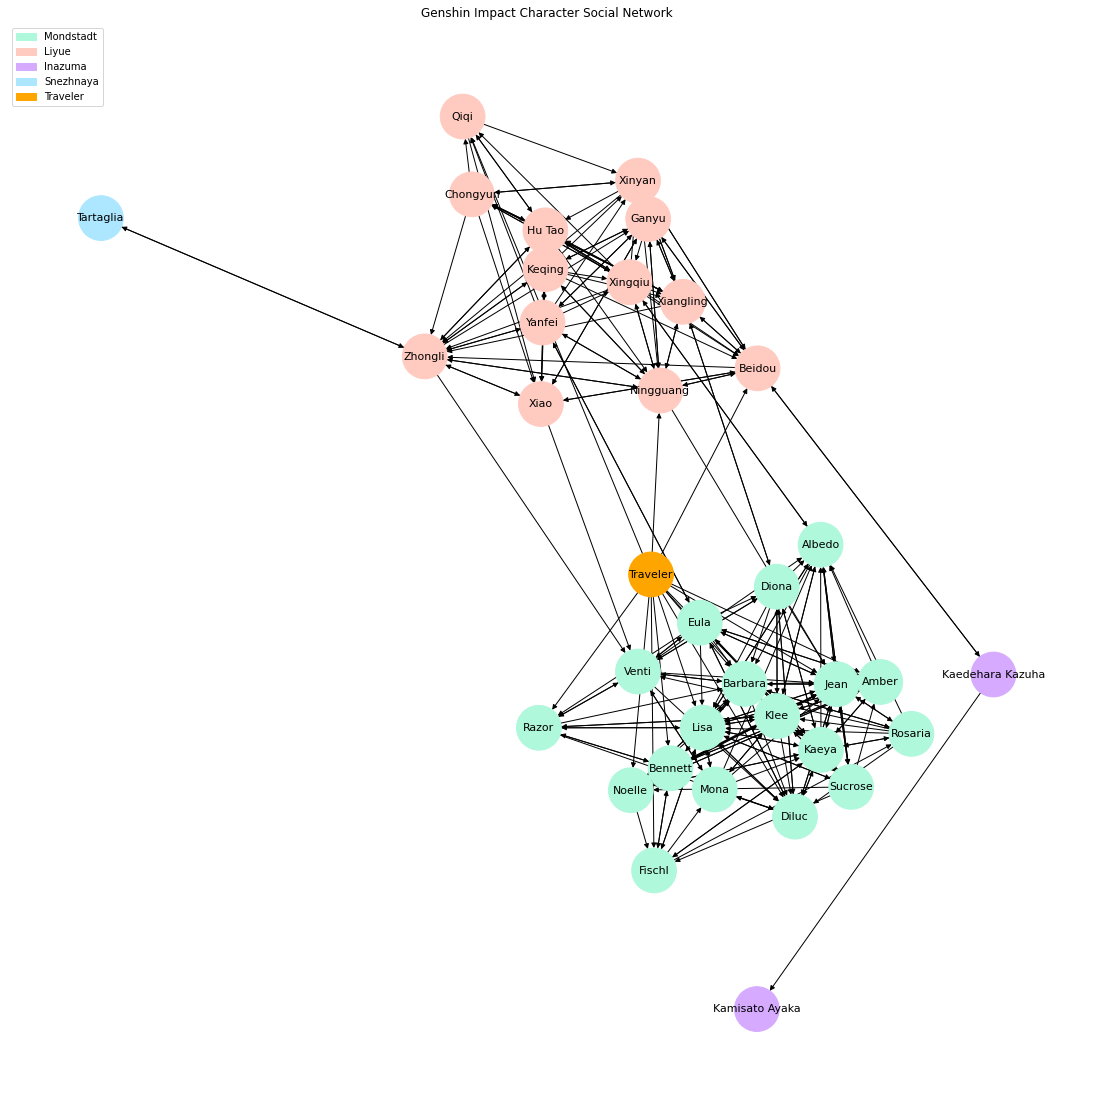

Wall time: 2.35 s


In [7]:
%%time

# create spring layout for 25 iterations to separate the nodes
np.random.seed(2021)
pos = nx.spring_layout(directed_graph, k=0.3, iterations=25)

plt.figure(1,figsize=(15,15)) 
nx.draw(directed_graph,
        pos = pos,
        node_size=2000,
        node_color=node_colors,
        with_labels=True,
        font_size = 11,
        font_color='black')

# create legend and show the plot
legend_tiles = [mpatches.Patch(color="#aff8db", label="Mondstadt"),
                mpatches.Patch(color="#ffcbc1", label="Liyue"),
                mpatches.Patch(color="#d5aaff", label="Inazuma"),
                mpatches.Patch(color="#ace7ff", label="Snezhnaya"),
                mpatches.Patch(color="#FFA500", label="Traveler"),
               ]

plt.title("Genshin Impact Character Social Network")
plt.legend(handles=legend_tiles, loc="upper left")
plt.show()
# uncomment to save picture
# plt.savefig('directed.png')

In [8]:
# function to get subgraph from node filter
def get_subgraph_by_nation(graph, target_nation="Mondstadt"):
    node_to_filter = []
    for node, nation in list(graph.nodes(data="nation")):
        if target_nation == nation:
            node_to_filter.append(node)
    return node_to_filter, graph.subgraph(node_to_filter)

# function to assign color for node visualization
def create_node_colors_from_graph(graph, nation_color_dict):
    node_colors = []
    for node, nation in list(graph.nodes(data="nation")):
        if nation in nation_color_dict:
            node_colors.append(nation_color_dict[nation])
    return node_colors

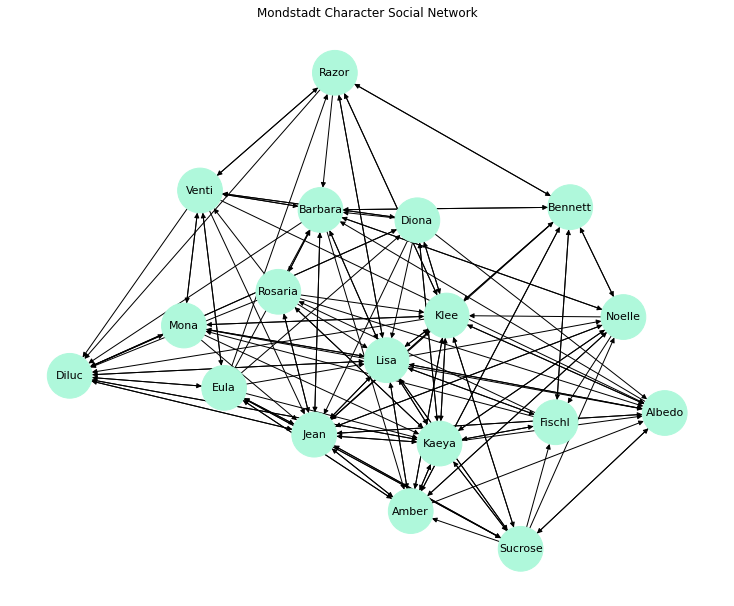

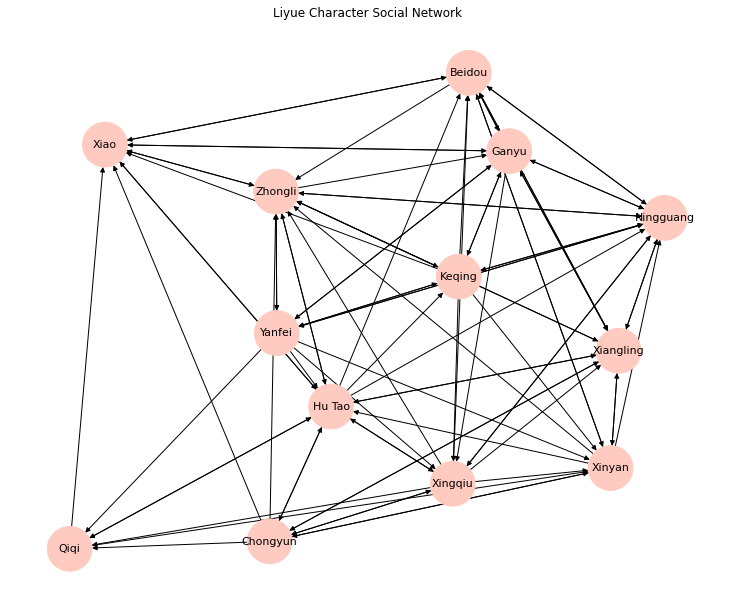

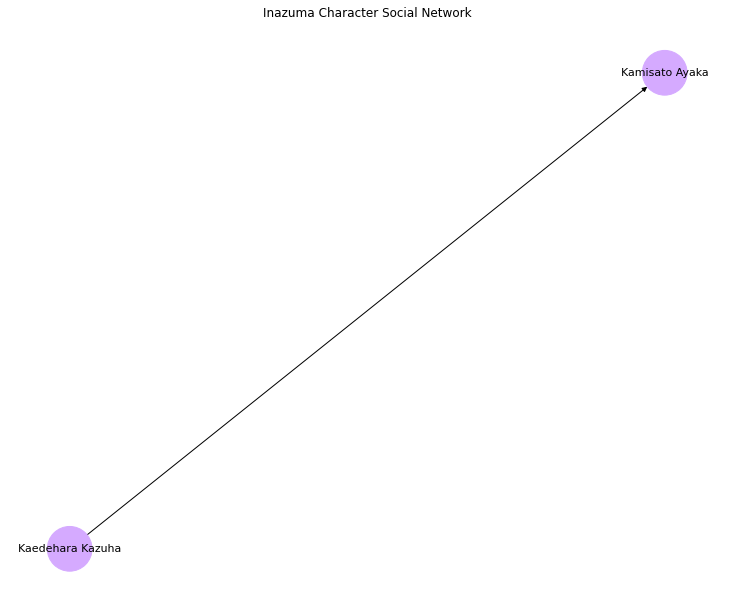

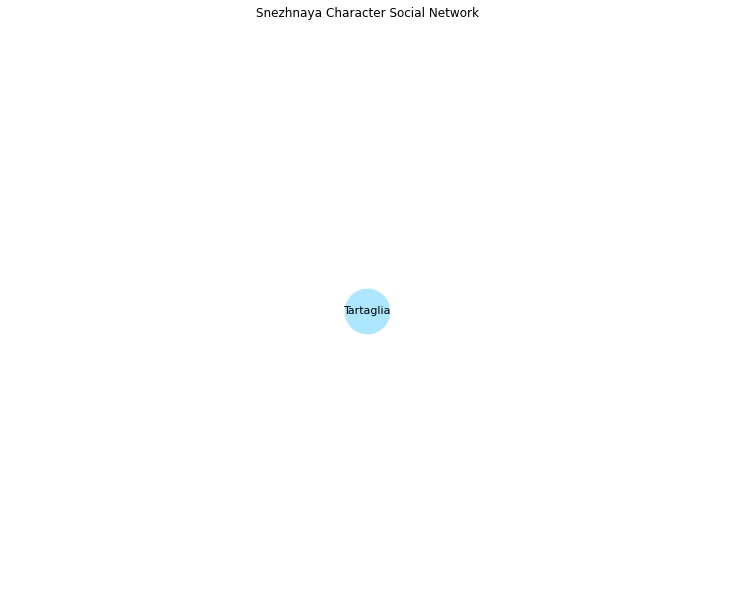

In [9]:
for target_nation in nation_color_dict.keys():
    filtered_nodes, subgraph = get_subgraph_by_nation(directed_graph, target_nation=target_nation)

    np.random.seed(2021)
    pos = nx.spring_layout(subgraph, k=0.3, iterations=25)
    node_colors = create_node_colors_from_graph(subgraph, nation_color_dict)
    plt.figure(1,figsize=(10,8)) 
    nx.draw(subgraph,
            pos = pos,
            node_color=node_colors,
            node_size=2000,
            with_labels=True,
            font_size = 11,
            font_color='black')
    plt.title(target_nation + " Character Social Network")
    plt.show()